In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_utils import *

In [2]:
window='20x20' # 30x30 10x10
df = pd.read_csv(f'/data/HSC/HSC_v6/step1/g_band_sextractor/{window}_10k_subset/segmented_mag_data_v1.csv')
predictions = pd.read_csv('/predictions/HSC_v6_NN_neurips_combined_with_5pool_v11/testing_predictions.csv')

In [3]:
full_df = pd.merge(df, predictions, on='object_id')

In [4]:
full_df['bias'] = pd.Series([calculate_bias(i, j, conventional=True) for i, j in zip(full_df['photoz'], full_df['specz'])])
full_df['outlier_rate'] = pd.Series([calculate_outlier_rate(i, j, conventional=True) for i, j in zip(full_df['photoz'], full_df['specz'])])
full_df['loss'] = pd.Series([calculate_loss(i, j) for i, j in zip(full_df['photoz'], full_df['specz'])])

Percentage of images with more than one object in a 20x20 central window: 13.90%


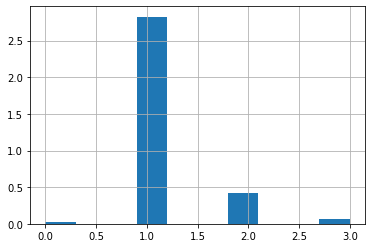

In [5]:
full_df["NUMBER_IN_CENTER"].hist(density=True)
print(f'Percentage of images with more than one object in a {window} central window: {(len(df[df["NUMBER_IN_CENTER"] > 1]) / len(df)):.2%}')

In [6]:
print(f'Average bias of crowded galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] > 1]["bias"]):.6f}')

Average bias of crowded galaxy centers: -0.001166


In [7]:
print(f'Average bias of lone galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] == 1]["bias"]):.6f}')

Average bias of lone galaxy centers: 0.000143


In [8]:
print(f'Average loss of crowded galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] > 1]["loss"]):.6f}')

Average loss of crowded galaxy centers: 0.040554


In [9]:
print(f'Average loss of lone galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] == 1]["loss"]):.6f}')

Average loss of lone galaxy centers: 0.057554


In [10]:
print(f'Outlier rate of crowded galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] > 1]["outlier_rate"]):.2%}')

Outlier rate of crowded galaxy centers: 1.78%


In [11]:
print(f'Outlier rate of lone galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] == 1]["outlier_rate"]):.2%}')

Outlier rate of lone galaxy centers: 3.74%


In [12]:
print(f'Average g band magnitude of crowded galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] > 1]["g_cmodel_mag"]):.6f}')

Average g band magnitude of crowded galaxy centers: 22.379392


In [13]:
print(f'Average g band magnitude of lone galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] == 1]["g_cmodel_mag"]):.6f}')

Average g band magnitude of lone galaxy centers: 21.430500


In [14]:
print(f'Average petrosian radius of crowded galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] > 1]["PETRO_RADIUS"]):.6f}')

Average petrosian radius of crowded galaxy centers: 8.659169


In [15]:
print(f'Average petrosian radius of lone galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] == 1]["PETRO_RADIUS"]):.6f}')

Average petrosian radius of lone galaxy centers: 8.259684


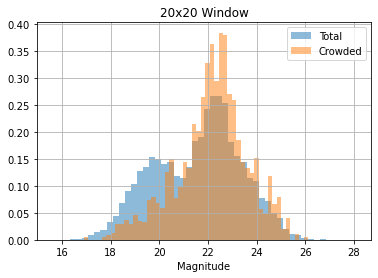

In [16]:
df['g_cmodel_mag'].hist(density=True, label='Total', bins=50, alpha=.5)
df[df['NUMBER_IN_CENTER'] > 1]['g_cmodel_mag'].hist(density=True, label='Crowded', bins=50, alpha=.5)
plt.xlabel('Magnitude')
plt.title(f'{window} Window')
plt.legend()

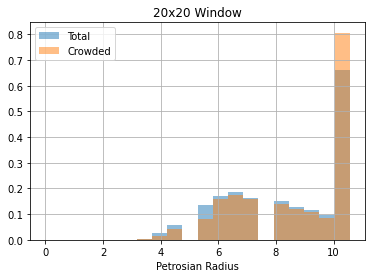

In [17]:
df['PETRO_RADIUS'].hist(density=True, label='Total', bins=20, alpha=0.5)
df[df['NUMBER_IN_CENTER'] > 1]['PETRO_RADIUS'].hist(density=True, label='Crowded', bins=20, alpha=.5)
plt.xlabel('Petrosian Radius')
plt.title(f'{window} Window')
plt.legend()

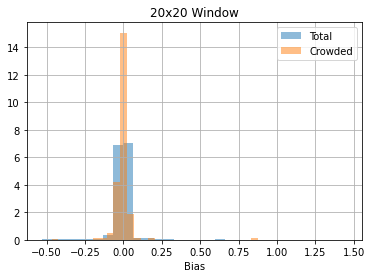

In [18]:
full_df['bias'].hist(density=True, label='Total', bins=30, alpha=.5)
full_df[full_df['NUMBER_IN_CENTER'] > 1]['bias'].hist(density=True, label='Crowded', bins=30, alpha=.5)
plt.xlabel('Bias')
plt.title(f'{window} Window')
plt.legend()

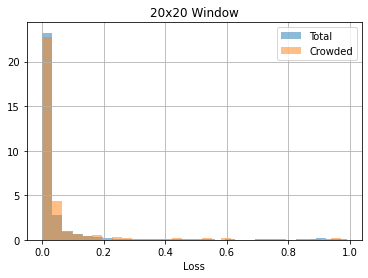

In [19]:
full_df['loss'].hist(density=True, label='Total', bins=30, alpha=.5)
full_df[full_df['NUMBER_IN_CENTER'] > 1]['loss'].hist(density=True, label='Crowded', bins=30, alpha=.5)
plt.xlabel('Loss')
plt.title(f'{window} Window')
plt.legend()

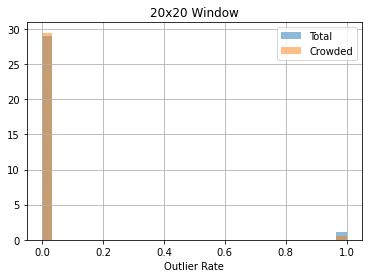

In [20]:
full_df['outlier_rate'].hist(density=True, label='Total', bins=30, alpha=.5)
full_df[full_df['NUMBER_IN_CENTER'] > 1]['outlier_rate'].hist(density=True, label='Crowded', bins=30, alpha=.5)
plt.xlabel('Outlier Rate')
plt.title(f'{window} Window')
plt.legend()

<AxesSubplot:xlabel='PETRO_RADIUS', ylabel='g_cmodel_mag'>

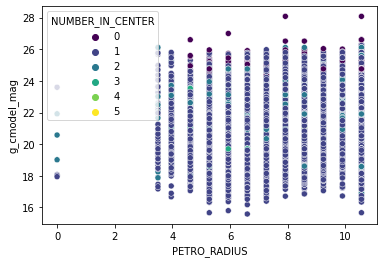

In [21]:
sns.scatterplot(y=df['g_cmodel_mag'], x=df['PETRO_RADIUS'], hue=df['NUMBER_IN_CENTER'], palette='viridis')

In [22]:
full_df

,object_id,NUMBER_IN_CENTER,ITEM_INDEX,PETRO_RADIUS,X_IMAGE,Y_IMAGE,XMIN_IMAGE,XMAX_IMAGE,YMIN_IMAGE,YMAX_IMAGE,g_cmodel_mag,photoz,specz,bias,outlier_rate,loss
0,42709992310082949,1,1,7.26,59.6118,60.2561,53,52,65,67,22.601219,0.794884,0.819175,-0.013352,0.0,0.007861
1,42709992310082949,1,2,9.24,54.4928,100.7437,51,97,60,104,22.601219,0.794884,0.819175,-0.013352,0.0,0.007861
2,42709992310082949,1,3,5.94,27.6016,93.3320,23,88,32,98,22.601219,0.794884,0.819175,-0.013352,0.0,0.007861
3,37494471788616312,1,1,10.56,77.8560,20.1041,75,17,80,23,23.141678,0.857280,0.890200,-0.017416,0.0,0.013301
4,37494471788616312,1,2,10.56,21.3930,94.8022,20,92,27,96,23.141678,0.857280,0.890200,-0.017416,0.0,0.013301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5891,70364500749976529,2,1,10.56,67.5000,43.9121,60,36,74,52,21.912723,0.527795,0.572640,-0.028516,0.0,0.034880
5892,70364500749976529,2,2,10.56,42.2756,36.2269,39,33,46,39,21.912723,0.527795,0.572640,-0.028516,0.0,0.034880
5893,70364500749976529,2,3,10.56,61.3630,83.6732,59,82,64,85,21.912723,0.527795,0.572640,-0.028516,0.0,0.034880
5894,70364500749976529,2,4,8.58,60.2286,61.1407,53,51,67,68,21.912723,0.527795,0.572640,-0.028516,0.0,0.034880
